<a href="https://colab.research.google.com/github/Sean-Reinhardt/Reinhardt-Sean/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points] 
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<AxesSubplot:>

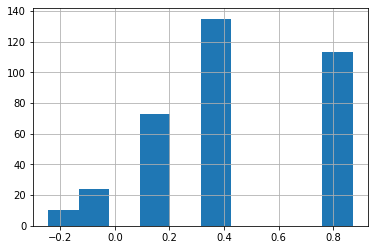

In [ ]:
#CT-1.1
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/CCD-Data.txt'

def remove_header(in_file, n):
  df = pd.read_csv(in_file, delimiter='\t', header=n)
  return df

df.iloc[:,4].hist()
# test to see if new data frame is same as in 02_intro_pandas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


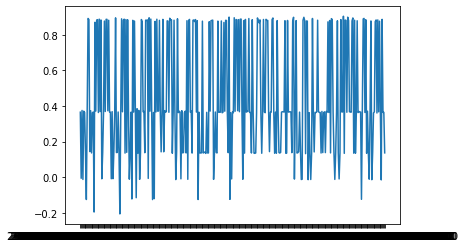

In [ ]:
#CT-1.5
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13)

def plot_difference(data, colm, coln, x):
  a_val = data[colm]
  b_val = data[coln]
  x_val = data[x]
  difference = a_val - b_val

  fig, ax = plt.subplots()
  ax.plot(x_val, difference)

plot_difference(df,'316.6137','780.0381','Unnamed: 0')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

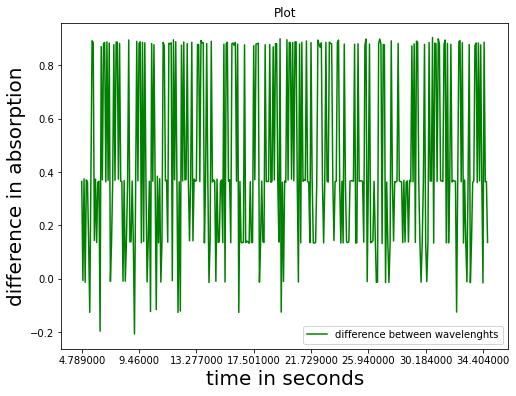

In [31]:
#CT-1.6
import pandas as pd
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13)

df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df['seconds'] = df['Unnamed: 0'].dt.time.apply(lambda t: f"{t.second}.{t.microsecond}")

def plot_difference(data, colm, coln, x):
  a_val = data[colm]
  b_val = data[coln]
  x_val = data[x]
  difference = a_val - b_val

  fig, ax = plt.subplots(figsize=(8,6))
  ax.plot(x_val, difference, label='difference between wavelenghts', color='green')
  ax.set_xlabel('time in seconds', fontsize=20,)
  ax.set_ylabel('difference in absorption', fontsize=20)
  ax.legend()
  ax.set_title('Plot')
  ax.xaxis.set_major_locator(ticker.AutoLocator())
  

plot_difference(df,'316.6137','780.0381','seconds')

plt.savefig('difference_plot_CT1.png', bbox_inches='tight')
files.download('difference_plot_CT1.png')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Subplot2')

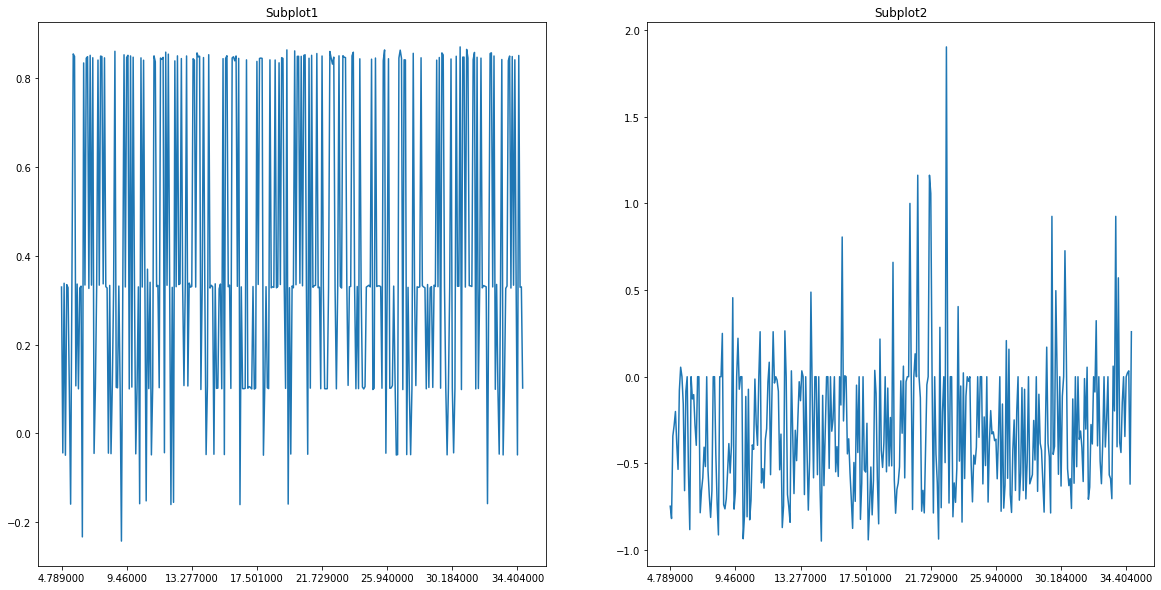

In [53]:
#CT-1.7
import pandas as pd
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13)

df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df['seconds'] = df['Unnamed: 0'].dt.time.apply(lambda t: f"{t.second}.{t.microsecond}")

x_val = df['seconds']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

#plt 1
y_val = df['316.6137']
axs[0].plot(x_val, y_val)
axs[0].xaxis.set_major_locator(ticker.IndexLocator(base=50, offset=0))
axs[0].set_title('Subplot1')

#plt2
y2_val = df['329.8728']
axs[1].plot(x_val, y2_val)
axs[1].xaxis.set_major_locator(ticker.IndexLocator(base=50, offset=0))
axs[1].set_title('Subplot2')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


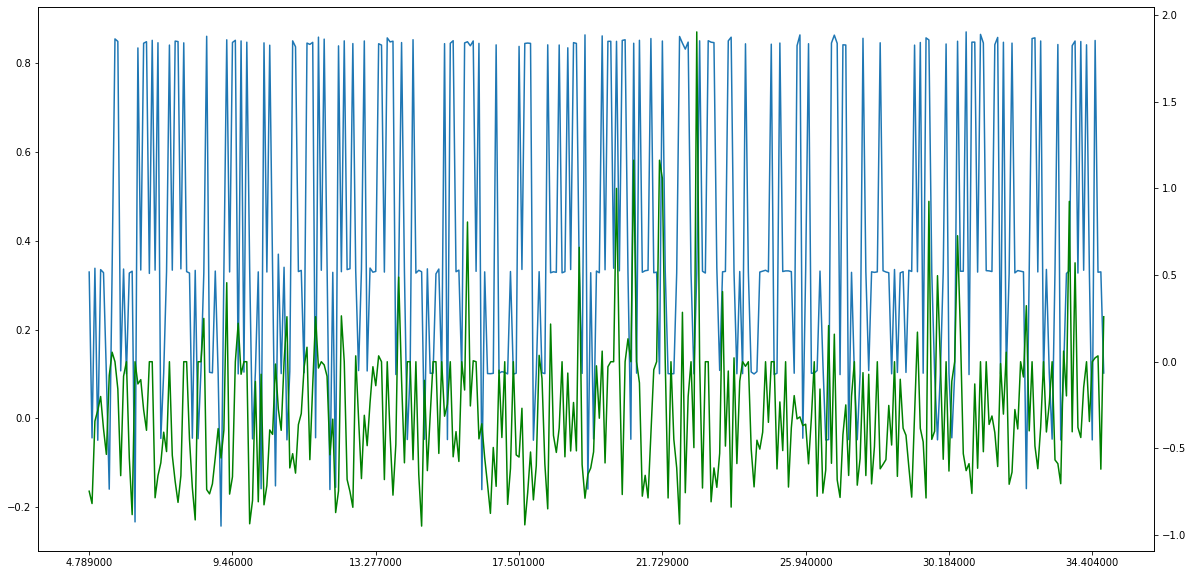

In [57]:
#CT-1.7.2
import pandas as pd
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datascience/CCD-Data.txt'

df = pd.read_csv(path, delimiter='\t', header=13)

df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df['seconds'] = df['Unnamed: 0'].dt.time.apply(lambda t: f"{t.second}.{t.microsecond}")

x_val = df['seconds']

fig, ax1 = plt.subplots(figsize=(20,10))
y_val = df['316.6137']
ax1.plot(x_val, y_val)
ax1.xaxis.set_major_locator(ticker.IndexLocator(base=50, offset=0))

ax2 = ax1.twinx()
y2_val = df['329.8728']
ax2.plot(x_val, y2_val, color='green')
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=50, offset=0))

plt.show()